## Задание 2

In [1]:
import numpy as np
n = 10
m2 = 10000
std1 = 1
A = np.eye(n)
generator = np.random.default_rng()
w = generator.multivariate_normal(np.zeros(n), A)
m1 = 1000


In [2]:
import torch
from torch import distributions as distr
sig = torch.nn.Sigmoid()

In [3]:
#M = np.array([1e1, 5 * 1e1, 1e2, 5 * 1e2, 1e3, 5 * 1e3], dtype=int)

In [4]:
M = np.hstack((np.linspace(0, 100, 5, dtype = int), np.linspace(100, 1000, 5, dtype = int), np.linspace(1000, 5000, 5, dtype = int)))

In [5]:
log_p_test_2_s = []
log_p_test_1_s = []
C_2_test_s = []
C_1_test_s = []

In [6]:

for m2 in M:
    X = generator.multivariate_normal(np.zeros(n), std1 * np.eye(n), m1 + m2)
    p = sig(torch.tensor(X@w))
    p = p.numpy()
    y = generator.binomial(1, p, size=None)
    X_train, X_test = torch.tensor(X[:m1], dtype = torch.float32), torch.tensor(X[m1:m1+m2], dtype = torch.float32)
    y_train, y_test = torch.tensor(y[:m1], dtype = torch.float32), torch.tensor(y[m1:m1+m2], dtype = torch.float32)
    
    logsig = torch.nn.LogSigmoid()
    def q(w, y, X, A, device = "cpu"):
        
        p_w_distr = distr.multivariate_normal.MultivariateNormal(torch.zeros(n, device=device), A)
        p_w = p_w_distr.log_prob(w)
        p_y= logsig(X@w) * y + logsig(-X@w) * (1 - y)
        q = -p_w - p_y.sum()
        return q
    device = "cpu"
    y_train.to(device)
    X_train.to(device)
    A_ = torch.tensor(A, device=device)
    w_map = torch.nn.Parameter(torch.tensor(w, dtype = torch.float32, device=device))
    opt = torch.optim.Adam([w_map], lr = 1e-3)
    for epoch in range(10000):
        opt.zero_grad()
        loss = q(w_map, y_train, X_train, A_, device=device)
        
        loss.backward()
        opt.step()
    p_test_1 = sig(X_test@w_map)
    def l(p, y):
        return torch.log(p * y + (1 - p)*(1 - y)).sum()
    l_p_test_1 = l(p_test_1, y_test)
    y_train_log_prob = 0
    N = 100000
    w_sample = torch.tensor(generator.multivariate_normal(np.zeros(n), A, N), dtype = torch.float32)
    logsoft = torch.nn.LogSoftmax()
    print(X_train.T.shape)
    print(w_sample.shape)
    lognormalized = logsoft((logsig(w_sample@X_train.T) * y_train + logsig(-w_sample@X_train.T) * (1 - y_train)).sum(dim = 1))
    loglikelyhood1 = logsig(w_sample@X_test.T) * y_test + (1 - y_test) * logsig(-w_sample@X_test.T)
    loglikelyhood = logsig(-w_sample@X_test.T)
    I1 = loglikelyhood1 + torch.unsqueeze(lognormalized, dim = 1)
    log_p_test_2_1 = torch.logsumexp(I1, dim = 0)
    p_test_2 = torch.exp(log_p_test_2_1)
    p_test_2 = p_test_2 * y_test + (1 - y_test) *(1 - p_test_2) 
    l_p_test_2 = log_p_test_2_1.sum()

    C_2 = torch.abs(p_test_2 - 0.5).sum()/m2
    C_1 = torch.abs(p_test_1 - 0.5).sum()/m2

    log_p_test_2_s.append(l_p_test_2.detach().numpy())
    log_p_test_1_s.append(l_p_test_1.detach().numpy())
    
    C_2_test_s.append(C_2.detach().numpy())
    C_1_test_s.append(C_1.detach().numpy())



torch.Size([10, 1000])
torch.Size([100000, 10])


/home/sasha/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])
torch.Size([10, 1000])
torch.Size([100000, 10])


In [13]:
log_p_test_1_s

[array(0., dtype=float32),
 array(-5.940333, dtype=float32),
 array(-16.63275, dtype=float32),
 array(-23.815409, dtype=float32),
 array(-25.321957, dtype=float32),
 array(-31.72194, dtype=float32),
 array(-110.98122, dtype=float32),
 array(-156.37708, dtype=float32),
 array(-201.50351, dtype=float32),
 array(-299.51917, dtype=float32),
 array(-292.10498, dtype=float32),
 array(-550.21185, dtype=float32),
 array(-850.1518, dtype=float32),
 array(-1145.6895, dtype=float32),
 array(-1443.538, dtype=float32)]

In [14]:
log_p_test_2_s

[array(0., dtype=float32),
 array(-7.1148424, dtype=float32),
 array(-18.489515, dtype=float32),
 array(-28.387743, dtype=float32),
 array(-33.15584, dtype=float32),
 array(-38.894825, dtype=float32),
 array(-128.54509, dtype=float32),
 array(-207.10516, dtype=float32),
 array(-247.8979, dtype=float32),
 array(-384.25714, dtype=float32),
 array(-394.6845, dtype=float32),
 array(-737.59625, dtype=float32),
 array(-1038.5903, dtype=float32),
 array(-1584.5713, dtype=float32),
 array(-1717.0547, dtype=float32)]

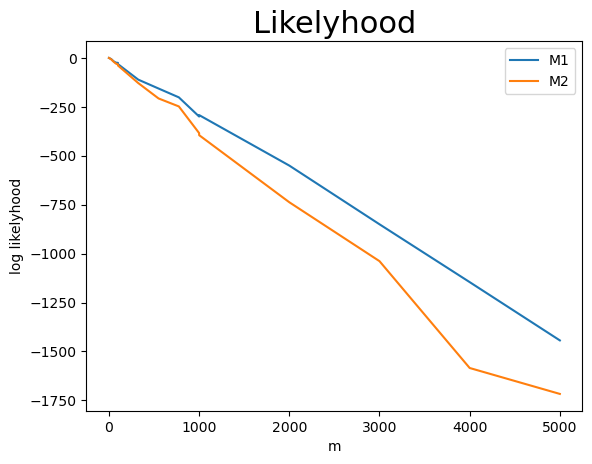

In [15]:
from matplotlib import pyplot as plt 


plt.plot(M, log_p_test_1_s, label = "M1")
plt.plot(M, log_p_test_2_s, label = "M2")
plt.title('Likelyhood', fontsize=22)
plt.xlabel('m')
plt.ylabel('log likelyhood')
plt.legend(loc='best')
plt.show()



In [16]:
C_2

tensor(0.3106)

In [17]:
C_1

tensor(0.3743, grad_fn=<DivBackward0>)

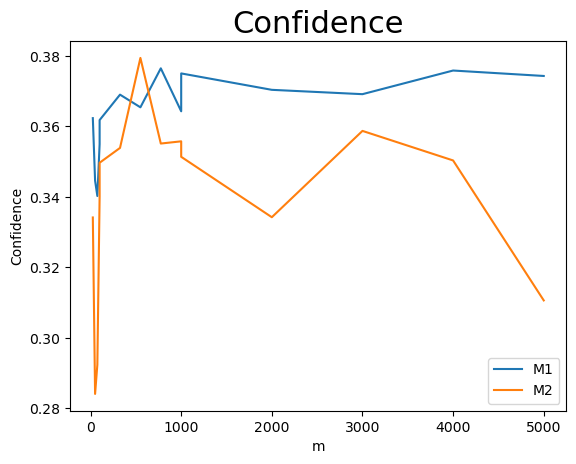

In [18]:
plt.plot(M, C_1_test_s, label = "M1")
plt.plot(M, C_2_test_s, label = "M2")
plt.title('Confidence', fontsize=22)
plt.xlabel('m')
plt.ylabel('Confidence')
plt.legend(loc='best')
plt.show()

### Вывод

При большой тестовой выборке вторая модель больше уверена в ответе, но при этом правдоподобие выборки сильно ниже чем у первой модели. 
На практике следует, что оценка параметров дает несколько завышенную оценку правдоподобия выборки, но при этом не сильно отличающуюся от точной апотерироной модели данных.